###Problem Set 2

In [1]:
import pandas
import pandasql


def num_rainy_days(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - a count of the number of days in the dataframe where
    the rain column is equal to 1 (i.e., the number of days it
    rained).  The dataframe will be titled 'weather_data'. You'll
    need to provide the SQL query.  You might find SQL's count function
    useful for this exercise.  You can read more about it here:
    
    https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT COUNT(1) 
    FROM weather_data
    WHERE rain = 1
    """
    
    #Execute your SQL command against the pandas frame
    rainy_days = pandasql.sqldf(q.lower(), locals())
    return rainy_days

In [2]:
import pandas
import pandasql

# temp of foggy and non foggy days
def max_temp_aggregate_by_fog(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return two columns and
    two rows - whether it was foggy or not (0 or 1) and the max
    maxtempi for that fog value (i.e., the maximum max temperature
    for both foggy and non-foggy days).  The dataframe will be 
    titled 'weather_data'. You'll need to provide the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT fog, MAX(maxtempi)
    FROM weather_data
    GROUP BY fog
    """
    
    #Execute your SQL command against the pandas frame
    foggy_days = pandasql.sqldf(q.lower(), locals())
    return foggy_days

In [3]:
import pandas
import pandasql

# Mean Temp on Weekends
def avg_weekend_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - the average meantempi on days that are a Saturday
    or Sunday (i.e., the the average mean temperature on weekends).
    The dataframe will be titled 'weather_data' and you can access
    the date in the dataframe via the 'date' column.
    
    You'll need to provide  the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    Also, you can convert dates to days of the week via the 'strftime' keyword in SQL.
    For example, cast (strftime('%w', date) as integer) will return 0 if the date
    is a Sunday or 6 if the date is a Saturday.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT AVG(meantempi)
    FROM weather_data
    WHERE cast(strftime('%w', date) as integer) = 0 
    OR cast(strftime('%w', date) as integer) = 6
    """
    
    #Execute your SQL command against the pandas frame
    mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
    return mean_temp_weekends

In [4]:
import pandas
import pandasql

# Mean Temp on Rainy Days
def avg_min_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data. More specifically you want to find the average
    minimum temperature (mintempi column of the weather dataframe) on 
    rainy days where the minimum temperature is greater than 55 degrees.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT AVG(mintempi)
    FROM weather_data
    WHERE mintempi > 55 and rain = 1
    """
    
    #Execute your SQL command against the pandas frame
    avg_min_temp_rainy = pandasql.sqldf(q.lower(), locals())
    return avg_min_temp_rainy

In [5]:
import csv

# Fixing Turnstile Data
def fix_turnstile_data(filenames):
    '''
    Filenames is a list of MTA Subway turnstile text files. A link to an example
    MTA Subway turnstile text file can be seen at the URL below:
    http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    The order of the fields should be preserved. Remember to read through the 
    Instructor Notes below for more details on the task. 
    
    In addition, here is a CSV reader/writer introductory tutorial:
    http://goo.gl/HBbvyy
    
    You can see a sample of the turnstile text file that's passed into this function
    and the the corresponding updated file in the links below:
    
    Sample input file:
    https://www.dropbox.com/s/mpin5zv4hgrx244/turnstile_110528.txt
    Sample updated file:
    https://www.dropbox.com/s/074xbgio4c39b7h/solution_turnstile_110528.txt
    '''
    for name in filenames:
        # your code here
        f_in = open(name, 'r')
        f_out = open('updated_' + name, 'w')
        
        reader_in = csv.reader(f_in, delimiter=',')
        writer_out = csv.writer(f_out, delimiter=',')
        
        for line in reader_in:
            first = line[0]
            second = line[1]
            third = line[2]
            for i in xrange(3, len(line), 5):
                out_line = [first, second, third] + line[i:i+5]
                writer_out.writerow(out_line)
                
        f_in.close()
        f_out.close()       

In [6]:
import csv

def create_master_turnstile_file(filenames, output_file):
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file. The input files do not have column header
    rows of their own.
    
    For example, if file_1 has:
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # your code here
            f_in = open(filename, 'r')
            reader_in = csv.reader(f_in, delimiter=',')
            for line in reader_in:
                first = line[0]
                second = line[1]
                third = line[2]
                for i in xrange(3, len(line), 5):
                    out_line = [first, second, third] + line[i:i+5]
                    master_file.write((',').join(out_line) + '\n')
            f_in.close()

In [7]:
import pandas as pd

def filter_by_regular(filename):
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    
    turnstile_data = pd.read_csv(filename)
    # your code here
    turnstile_data = turnstile_data[turnstile_data['DESCn'] == 'REGULAR']
    # more of your code here
    return turnstile_data

In [8]:
import pandas

def get_hourly_entries(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    #your code here
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df.shift(periods=1, axis=0)['ENTRIESn']
    df['ENTRIESn_hourly'].fillna(1, inplace=True)
    
    return df

In [9]:
import pandas

def get_hourly_exits(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    
    #your code here
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df.shift(periods=1, axis=0)['ENTRIESn']
    df['ENTRIESn_hourly'].fillna(0, inplace=True)
    
    df['EXITSn_hourly'] = df['EXITSn'] - df.shift(periods=1, axis=0)['EXITSn']
    df['EXITSn_hourly'].fillna(0, inplace=True)
    return df

In [10]:
import pandas

def time_to_hour(time):
    '''
    Given an input variable time that represents time in the format of:
    "00:00:00" (hour:minutes:seconds)
    
    Write a function to extract the hour part from the input variable time
    and return it as an integer. For example:
        1) if hour is 00, your code should return 0
        2) if hour is 01, your code should return 1
        3) if hour is 21, your code should return 21
        
    Please return hour as an integer.
    '''
    
    hour = int(time[0:2])
    return hour

In [11]:
from datetime import datetime

def reformat_subway_dates(date):
    '''
    The dates in our subway data are formatted in the format month-day-year.
    The dates in our weather underground data are formatted year-month-day.
    
    In order to join these two data sets together, we'll want the dates formatted
    the same way.  Write a function that takes as its input a date in the MTA Subway
    data format, and returns a date in the weather underground format.
    
    Hint: 
    There are a couple of useful functions in the datetime library that will
    help on this assignment, called strptime and strftime. 
    More info can be seen here and further in the documentation section:
    http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime
    '''
    date_formatted = datetime.strptime(date, '%m-%d-%y').strftime('%Y-%m-%d')
    return date_formatted

###Problem set 3

In [21]:
import pandas as pd
%matplotlib inline

turnstile_weather = pd.read_csv('turnstile_data_master_with_weather.csv')

In [20]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    rain = turnstile_weather[turnstile_weather['rain'] == 1]
    no_rain = turnstile_weather[turnstile_weather['rain'] == 0]
    
    rain['ENTRIESn_hourly'].hist(alpha=0.5, bins=20)
    no_rain['ENTRIESn_hourly'].hist(alpha=0.5, bins=20)
    
    # data doesn't look normal so cannot use welch t-test
    
    # your code here to plot a historgram for hourly entries when it is raining
    # turnstile_weather['...'] # your code here to plot a historgram for hourly entries when it is not raining
    return plt

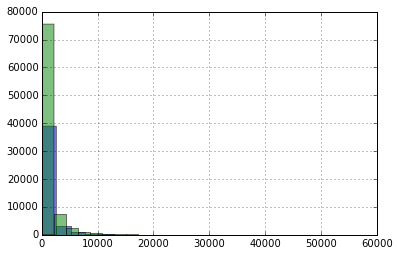

In [23]:
entries_histogram(turnstile_weather);

In [13]:
import numpy as np
import scipy
import scipy.stats as ss
import pandas

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    
    rain = turnstile_weather[turnstile_weather['rain'] == 1]
    no_rain = turnstile_weather[turnstile_weather['rain'] == 0]
    
    with_rain_mean = rain['ENTRIESn_hourly'].mean()
    without_rain_mean = no_rain['ENTRIESn_hourly'].mean()
    
    U, p = ss.mannwhitneyu(rain['ENTRIESn_hourly'], no_rain['ENTRIESn_hourly'])
    
    return with_rain_mean, without_rain_mean, U, p # leave this line for the grader

In [25]:
mann_whitney_plus_means(turnstile_weather)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

In [14]:
import numpy as np
import pandas
import statsmodels.api as sm

"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    features_with_intercept = sm.add_constant(features)
    model = sm.OLS(values, features_with_intercept).fit()
    result = model.params
    intercept, params = result[0], result[1:]
    
    #print model.summary()
    
    return intercept, params

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'meantempi', 'fog']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    dummy_hour = pandas.get_dummies(dataframe['Hour'], prefix='hour')
    features = features.join(dummy_hour)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + np.dot(features, params)
    return predictions

In [15]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist()
    return plt

In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    
    # your code here
    r_squared = 1 - np.sum((data - predictions)**2)/np.sum((data - np.mean(data))**2)
    
    return r_squared

###Problem set 4

In [17]:
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(aes(x='Hour', y='ENTRIESn_hourly'), 
                  data=turnstile_weather.groupby('Hour').mean().reset_index()) \
                  + geom_point(color='red') + geom_line(color='red')
    return plot

In [18]:
from pandas import *
from ggplot import *

def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''

    plot = ggplot(aes(x='ENTRIESn_hourly'), 
                  data=turnstile_weather.groupby('UNIT').mean().reset_index()) \
                  + geom_histogram(binwidth=200) + ylab('Frequency') + \
                  ggtitle('Histogram of ENTRIESn_hourly grouped by subway stations')
    return plot

###Questions

**1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?**

The Mann-Whitney U-test. I used a one-tail p-value. The null hypothesis H_0 is the probability of an observation from the population X exceeding an observation from the second population Y equals the probability of an observation from Y exceeding an observation from X : P(X > Y) = P(Y > X) or P(X > Y) + 0.5·P(X = Y) = 0.5. A stronger null hypothesis commonly used is "The distributions of both populations are equal" which implies the previous hypothesis (from [Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)). The crtical p-value I chose is 0.05.

**1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.**

The Mann-Whitney is a non-parametric test that tests whether one distribution is stochastically greater than the other. Since it's non-parametric, it doesn't make assumptions about the underlying distribution. Therefore, with the distribution of the ridership data being not normally distribution, it makes sense to use the MW test.

**1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.**

With rain mean, 1105.4463767458733. Without rain mean, 1090.278780151855. p-value: 0.024999912793489721

**1.4 What is the significance and interpretation of these results?**

With the results above, at a significance level of alpha=0.5, we reject the null hypothesis that the distributions of both populations (i.e. ridership when raining and when not raining is the same).

**2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:**

- OLS using Statsmodels or Scikit Learn
- Gradient descent using Scikit Learn
- Or something different?

OLS using Statsmodels

**2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?**

I used 'rain', 'precipi', 'Hour', 'meantempi', 'fog' as features in my model. And created dummy variables for 'UNIT', i.e. a proxy for the subway station.

**2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”**  

- Rain - included because the MW test shows significance at the 0.05.

- Precipitation - it's quite synonymous to rain

- Hour - certain hours of the day correspond to higher ridership (categorical variable)

- meantempi (daily average temperature) - not likely a good feature but just put it in to the regression and see how its p-value turns out. Intuitively people might not want to ride at extremely hot or cold days

- fog - looks like foggy days have lower ridership from histogram

- UNIT - hard to tell from visualization but just put it in to the regression and see how its p-value turns out. Intuitively, certain stations should be more popular than others

In [48]:
import seaborn as sns

(0, 10000)

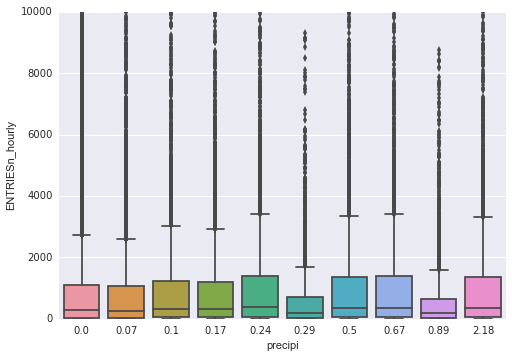

In [54]:
sns.boxplot(x="precipi", y="ENTRIESn_hourly", data=turnstile_weather.sort('precipi'))
plt.ylim(0,10000)

(0, 20000)

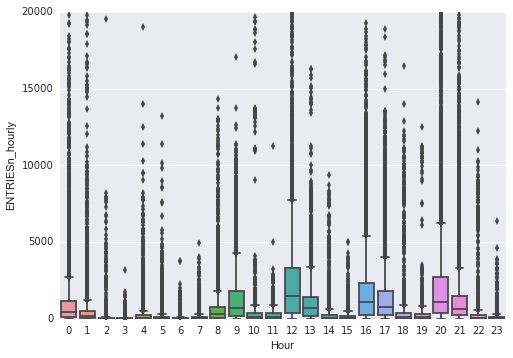

In [55]:
sns.boxplot(x="Hour", y="ENTRIESn_hourly", data=turnstile_weather.sort('Hour'))
plt.ylim(0,20000)

(0, 10000)

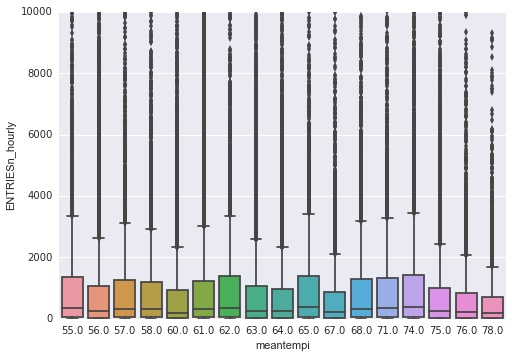

In [57]:
sns.boxplot(x="meantempi", y="ENTRIESn_hourly", data=turnstile_weather.sort('meantempi'))
plt.ylim(0,10000)

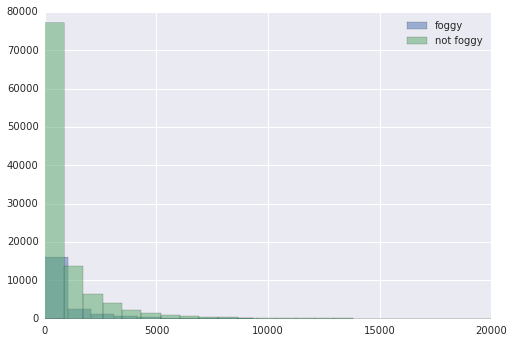

In [63]:
turnstile_weather[turnstile_weather['fog'] == 1]['ENTRIESn_hourly'].hist(alpha=0.5, bins=50, label='foggy')
turnstile_weather[turnstile_weather['fog'] == 0]['ENTRIESn_hourly'].hist(alpha=0.5, bins=50, label='not foggy')
plt.xlim(0,20000)
plt.legend()
plt.show()

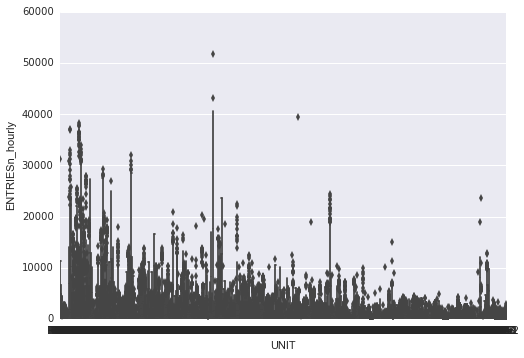

In [65]:
sns.boxplot(x="UNIT", y="ENTRIESn_hourly", data=turnstile_weather.sort('UNIT'));

**2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?**

rain: 3.7819, precipi: -34.5090, meantempi: -13.1118, fog: 191.8612

**2.5 What is your model’s R2 (coefficients of determination) value?**

R-squared:                       0.522

**2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?**

R2 is the amount of variation of the outcome that is predicted by the amount of variation of the predictors. R2 is only slightly better than a coin-toss (i.e. 50%) which is not very good. Given this R2, there are likely better models like random forest or support vector machines that could fit this data since there are likely some interactions between the variables.

**Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.**

**3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.
You can combine the two histograms in a single plot or you can use two separate plots.
If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.
For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.
Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.**

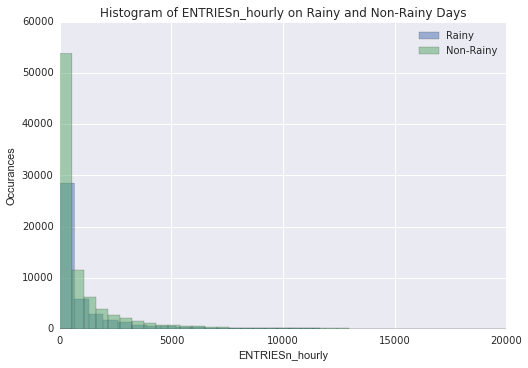

In [77]:
turnstile_weather[turnstile_weather['rain'] == 1]['ENTRIESn_hourly'].hist(alpha=0.5, bins=80,
                                                                         label='Rainy')
turnstile_weather[turnstile_weather['rain'] == 0]['ENTRIESn_hourly'].hist(alpha=0.5, bins=80,
                                                                         label='Non-Rainy')
plt.xlim(0,20000)
plt.title('Histogram of ENTRIESn_hourly on Rainy and Non-Rainy Days')
plt.ylabel('Occurances')
plt.xlabel('ENTRIESn_hourly')
plt.legend()
plt.show()

**3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:
Ridership by time-of-day
Ridership by day-of-week**

In [72]:
turnstile_weather['day_of_week'] = \
turnstile_weather['DATEn'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())

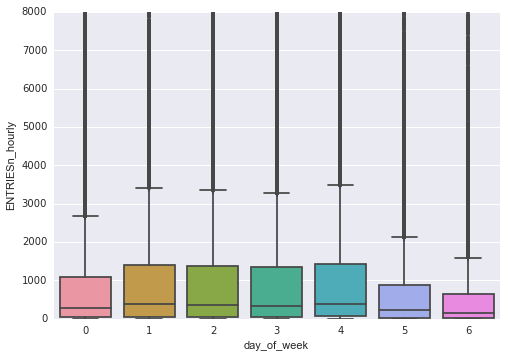

In [76]:
sns.boxplot(x="day_of_week", y="ENTRIESn_hourly", data=turnstile_weather.sort('day_of_week'))
plt.ylim(0,8000)
plt.show()

**4.1 From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?**

It is hard to say whether more people ride the NYC when it is raining than when it is not.

**4.2 What analyses lead you to this conclusion? You should use results from both your statistical
tests and your linear regression to support your analysis.**

The inconclusive conclusion above is due to the various results from the above analyses:

- From the Mann Whitney U-test, there is a slight increase in ridership of the subway when it is raining. Given the significance level of the test (alpha=0.5), there is a 95% chance that if you take additional samples of ridership date in the future that you'll see more people ride the NYC subway when it is raining. 

- From a visualization perspective (i.e. histogram), the difference in ridership is hard to discern.

- From the result of the linear regression, the p-value of 'rain' as a variable is 0.922, which is way higher the commonly accepted alpha of 0.05.

**5.1 Please discuss potential shortcomings of the methods of your analysis, including:
Dataset,
Analysis, such as the linear regression model or statistical test.**

Potential shortcomings of the dataset:

- Time period of data collected: the data was only collected for the month of May when it has nice weather in NYC. If it were collected for the months from September to March when the weather it's a bit more undesirable. Different trends/insights may be derived.

- Improved features set: the improved features set only improved the R2 by 0.02. So the data collected so far may just not be enough for the prediction. Other sources of data may be needed to improve the prediction.

Potential shortcomings of the analysis:

- Interaction between variables: linear regression doesn't take into account the effect of the interaction of variables on the outcome unless the interaction terms are specified. Methods like support vector machines and tree-based methods may have more predictive power. It also assumes that the relationship between the predictor and the outcome is linear which may not be true for some variables.

- Statistical test: the Mann Whitney test probably is more appropriate for determining the difference between ridership on rainy vs. non-rainy days since it is non-parametric (unlike linear regression).

**5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?**